In [12]:
import pandas as pd
import os
import numpy as np
import pickle as pkl
import copy
import matplotlib.pyplot as plt
import re
import scipy.stats as st
import copy
import itertools
from statsmodels.stats.multitest import multipletests
import sys
sys.path.append(os.path.abspath(".."))
from torch import nn
import torch
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import itertools
import copy
from scipy.spatial.distance import squareform, pdist
from matplotlib.pyplot import cm
from utilities.data_utils import *

In [13]:
METRIC_LS = ['AUC','F1']
# seed_vec = list(set(range(100))-(set([34,69,99]+list(range(6,100,10))+list(range(2,100,10)))))
# seed_vec = [1,11,21,31,41,51,61,71,81,91]
# seed_vec = [0,10,20,30,40,50,60,70,80,90]
results = {METRIC:{} for METRIC in METRIC_LS}
data_name = ''


methods = ['LR','RF','AdaBoost']
for method in methods:
    folder = f'logs/logs_semisyn/'
    # folder = f'/Users/jendawk/logs/SEMISYN_OCT13/METABS_var1.5_subsamp/logs_semisyn/{method}'
    for root, dirs, files in os.walk(folder):
        # if '_1/' not in root:
        #     continue
        if data_name not in root:
            continue
        if folder==root:
            continue
        # if folder==root or '/old' in root or 'june_4' in root or '/OLD' in root or 'ONLY_PERTURBED' in root or 'SQRT' in root:
        #     continue
        if f'res.csv' in files:
            n_subjs = root.split('_')[-3]
            case = root.split('_'+n_subjs)[0].split(method+'/')[-1].split('clr')[-1]
            if data_name !='':
                case = case.replace(data_name + '_','')
            tmp = pd.read_csv(os.path.join(root, f'res.csv'), index_col=[0])
            tmp = tmp.iloc[:-5]
            # tmp = tmp.iloc[:-5].loc[[f'seed_{s}' for s in seed_vec]]

            for METRIC in METRIC_LS:
                if case not in results[METRIC].keys():
                    results[METRIC][case]={}
                if method not in results[METRIC][case].keys():
                    results[METRIC][case][method]={}
                results[METRIC][case][method][int(n_subjs)]=tmp[METRIC].values

In [14]:
METRIC_LS = ['AUC','F1']
folder_dict ={'MMETHANE':'MMETHANE',
    'FFNN':'FNN'}
path='logs/logs_semisyn/'
# folder_dict = {
#     'MMETHANE':'/Users/jendawk/logs/SEMISYN_OCT13/METABS_var1.5_subsamp/mmethane_oct7/'}
# path=''
# seed_vec = [1,11,21,31,41,51,61,71,81,91]
keep = ''
# method='Our Model'
# results = {METRIC:{} for METRIC in METRIC_LS}
tracking = {}
for method,fo in folder_dict.items():
    tracking[method]=[]
    for root, dirs, files in os.walk(os.path.join(path, fo)):
        # if '_1_' not in root:
        #     continue
        if 'results_last.csv' in files:
            if '_24_' in root or 'no_prior_adj' in root or '/old' in root or 'TEST' in root:
                continue
            if keep not in root:
                continue
            # if method=='Fully-connected NN':
            #     print(root)
            #     continue
            n_subjs = root.split('_SEMISYN')[0].split('_FULL')[0]
            if '__' in n_subjs:
                n_subjs = n_subjs.split('__')[0].split('_')[-1]
            else:
                n_subjs = n_subjs.split('_')[-1]
                
            case = root.split('_'+n_subjs)[0].split('/')[-1]
            # print(n_subjs)
            # print(case)
            seed = root.split('__')[1]
            tmp = pd.read_csv(os.path.join(root, 'results_last.csv'), index_col=[0]).iloc[:-5,:]
            # if case=='and_metabs' and n_subjs=='1000':
            #     print(tmp[['F1','AUC']])
            #     print('')
            #     print('')
            for METRIC in METRIC_LS:       
                if case not in results[METRIC].keys():
                    results[METRIC][case]={}
                if method not in results[METRIC][case].keys():
                    results[METRIC][case][method]={}
                if int(n_subjs) not in results[METRIC][case][method].keys():
                    results[METRIC][case][method][int(n_subjs)] = list(tmp[METRIC].values)
                    tracking[method].append((case, n_subjs, seed, len(list(tmp[METRIC].values))))
                else:
                    results[METRIC][case][method][int(n_subjs)].extend(list(tmp[METRIC].values))
                    tracking[method].append((case, n_subjs, seed, len(list(tmp[METRIC].values))))

/var/folders/kg/lq54nq416jqg1h8qrw2_tsp80000gn/T/ipykernel_38993/3751370130.py:105: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/kg/lq54nq416jqg1h8qrw2_tsp80000gn/T/ipykernel_38993/3751370130.py:105: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


metabs AUC
36      MMETHANE
48      MMETHANE
64      MMETHANE
128     MMETHANE
300     MMETHANE
1000          LR
dtype: object
                              36            48            64            128   \
MMETHANE vs LR        6.223228e-02  1.544772e-02  1.048726e-02  4.452044e-02   
MMETHANE vs RF        4.583015e-12  1.427719e-17  1.813092e-22  7.804052e-17   
MMETHANE vs AdaBoost  8.247813e-25  2.870553e-25  8.954564e-23  1.508389e-14   
MMETHANE vs FFNN      1.361441e-06  5.569406e-21  1.090749e-15  1.226195e-21   
LR vs RF                       NaN           NaN           NaN           NaN   
LR vs AdaBoost                 NaN           NaN           NaN           NaN   
LR vs FFNN                     NaN           NaN           NaN           NaN   

                              300           1000  
MMETHANE vs LR        3.323168e-01  2.406151e-02  
MMETHANE vs RF        1.512291e-07           NaN  
MMETHANE vs AdaBoost  1.240021e-05           NaN  
MMETHANE vs FFNN      4.1810

/var/folders/kg/lq54nq416jqg1h8qrw2_tsp80000gn/T/ipykernel_38993/3751370130.py:105: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


otus AUC
36      MMETHANE
48      MMETHANE
64      MMETHANE
128     MMETHANE
300     AdaBoost
1000          LR
dtype: object
                              36            48            64            128   \
MMETHANE vs LR        2.447998e-09  6.566325e-07  1.358930e-04  7.346030e-02   
MMETHANE vs RF        3.653028e-03  6.510762e-03  1.446887e-03  2.379559e-02   
MMETHANE vs AdaBoost  3.362830e-12  1.728778e-10  1.867975e-15  5.210321e-06   
MMETHANE vs FFNN      9.580545e-04  4.535088e-05  5.457884e-10  9.265919e-22   
LR vs AdaBoost                 NaN           NaN           NaN           NaN   
RF vs AdaBoost                 NaN           NaN           NaN           NaN   
AdaBoost vs FFNN               NaN           NaN           NaN           NaN   
LR vs RF                       NaN           NaN           NaN           NaN   
LR vs FFNN                     NaN           NaN           NaN           NaN   

                          300           1000  
MMETHANE vs LR             

/var/folders/kg/lq54nq416jqg1h8qrw2_tsp80000gn/T/ipykernel_38993/3751370130.py:105: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


and_otus AUC
36      MMETHANE
48      MMETHANE
64      MMETHANE
128     MMETHANE
300     MMETHANE
1000    MMETHANE
dtype: object
                          36        48            64        128   \
MMETHANE vs LR        0.000712  0.004105  8.064749e-07  0.000004   
MMETHANE vs RF        0.004384  0.060537  1.199954e-05  0.002014   
MMETHANE vs AdaBoost  0.002438  0.047606  2.233424e-06  0.000079   
MMETHANE vs FFNN      0.001134  0.053745  3.899092e-06  0.000009   

                              300           1000  
MMETHANE vs LR        2.057599e-07  2.056693e-07  
MMETHANE vs RF        6.568643e-02  1.511512e-01  
MMETHANE vs AdaBoost  6.243218e-06  8.681210e-07  
MMETHANE vs FFNN      2.057081e-07  2.053847e-07  


/var/folders/kg/lq54nq416jqg1h8qrw2_tsp80000gn/T/ipykernel_38993/3751370130.py:105: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


both_and AUC
36      MMETHANE
48      MMETHANE
64      MMETHANE
128     MMETHANE
300     MMETHANE
1000    MMETHANE
dtype: object
                              36            48            64            128   \
MMETHANE vs LR        7.327490e-09  4.219144e-09  6.749904e-09  1.699079e-25   
MMETHANE vs RF        2.678125e-06  1.396055e-05  5.812616e-08  3.803519e-12   
MMETHANE vs AdaBoost  1.492030e-07  1.951374e-08  7.129329e-11  4.707828e-21   
MMETHANE vs FFNN      5.907044e-02  2.679943e-04  9.776446e-05  4.111560e-12   

                              300           1000  
MMETHANE vs LR        6.120404e-34  2.535150e-34  
MMETHANE vs RF        3.636507e-23  1.279191e-03  
MMETHANE vs AdaBoost  7.578401e-32  1.222966e-33  
MMETHANE vs FFNN      6.122599e-30  3.065874e-13  


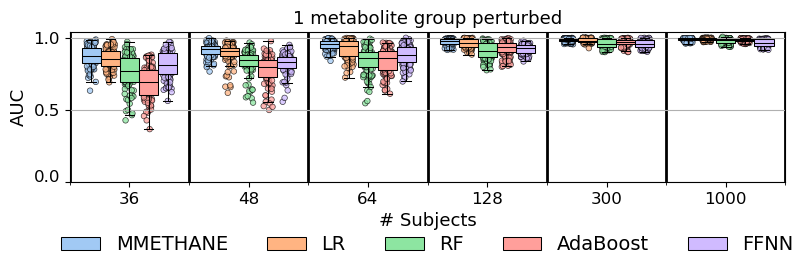

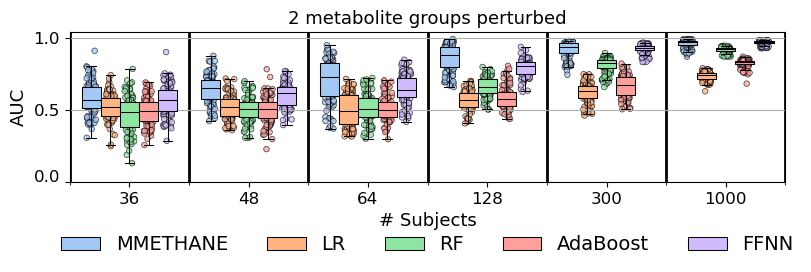

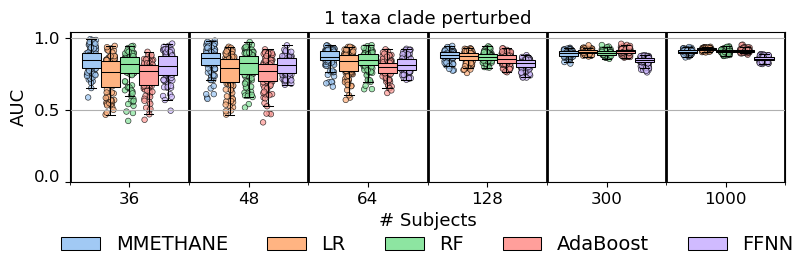

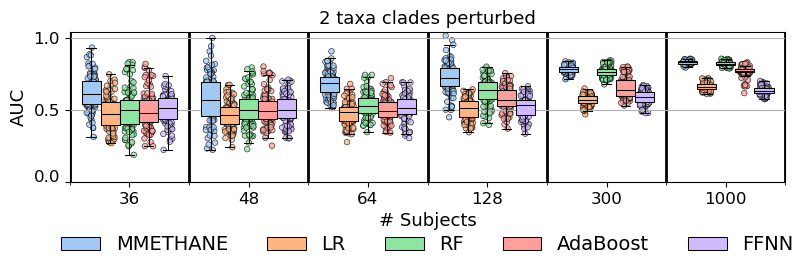

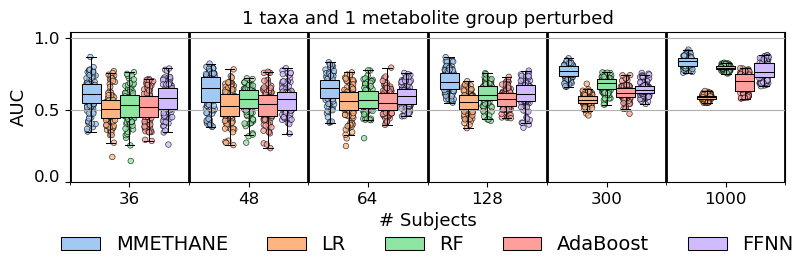

In [16]:
cmap = "pastel"
order=['MMETHANE','LR']
fname='semisyn-all'
order=['MMETHANE','LR','RF','AdaBoost','FFNN']
figdata_path='figdata/'
figpath = 'figures/'
# order=['MMETHANE','LR','RF','AdaBoost']
# order=['MMETHANE','RF']
# order=['LR']
# order=['LR','RF','AdaBoost']
med_dict={}
# order=['LR']
keys={}
ps={}
df_dict={}
CASES=['metabs','and_metabs','otus','and_otus','both_and']
for METRIC in ['AUC']:
    best={}
    append=False
    lastiter=0
    for case in CASES:
        lastiter+=1
    # for case in ['otus']:
        # if len(results[METRIC][case].keys())>1:
        dat = results[METRIC][case]
        data={}
        dd={'medians':{}, '5%':{},'95%':{}}
        for method,v in dat.items():
            dat2 = results[METRIC][case][method]
            for nsub,v in v.items():
                # if len(v)<100:
                #     v = np.concatenate([v, [np.median(v)]*(100-len(v))])
                data[(method, nsub)]=v
            dd['medians'][method] = {k:np.median(v) for k,v in dat2.items()}
            dd['5%'][method] = {k:np.percentile(v,5) for k,v in dat2.items()}
            dd['95%'][method] = {k:np.percentile(v,95) for k,v in dat2.items()}
        # try:
        #     tb = pd.DataFrame(data)
        # except:
        lens = [(k,len(v)) for k,v in data.items()]
        ltmp = [len(v) for k,v in data.items()]
        ltmp.append(100)
        for k,l in lens:
            if l<100:
                # print(case, k)
                # print(f'{max(ltmp)-l} missing')
                if isinstance(data[k], list):
                    tmp = data[k]
                else:
                    tmp = data[k].tolist()
                var =  np.var(tmp)
                # if case=='and_metabs':
                #     filler = np.random.normal(np.median(tmp), np.sqrt(var), size=max(ltmp)-l)
                #     else:
                # else:
                filler = np.random.normal(np.median(tmp), np.sqrt(var), size=max(ltmp)-l)
                data[k]=np.array(tmp+filler.tolist())
        tb = pd.DataFrame(data)
        tb.index = [METRIC]*tb.shape[0]
        stacked = tb.T.stack().reset_index().iloc[:,[0,1,3]]
        stacked.columns = ['Method','# Subjects',METRIC]
        fig, ax = plt.subplots(figsize=(8.5,3.25))
        datasets = [36,48,64,128,300,1000]
        # datasets = [50,100,200]
        f=sns.stripplot(data=stacked, x='# Subjects',y=METRIC,hue='Method', dodge=True, legend=False, ax=ax, 
                        jitter=0.2, edgecolor='k',                        
                      linewidth=0.5, order=datasets, size=4,palette=cmap, hue_order=order, alpha=0.75, zorder=0) 
        f=sns.boxplot(data=stacked, x='# Subjects',y=METRIC,hue='Method',ax=ax, showfliers=False, saturation=1,
                      order=datasets,palette=cmap, hue_order=order,linewidth=0.75, linecolor='k')
                      # medianprops={"color": "k", "linewidth": 2})
        f.tick_params(labelsize=12)

        # ax.set_xticklabels([36,48,64,128,300,1000])
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.grid(True, which='minor', color='black', lw=2)
        # ax.xaxis.set_major_locator(MultipleLocator(0.1))
        ax.yaxis.grid(True) # Hide the horizontal gridlines
        # ax.xaxis.grid(True, which='major', color='gray',lw=0.5)
        case_dict = {'otus':'1 taxa clade perturbed','and_otus':'2 taxa clades perturbed','metabs':'1 metabolite group perturbed','and_metabs':'2 metabolite groups perturbed','both_and':'1 taxa and 1 metabolite group perturbed'} 
        ax.set_title(case_dict[case], fontsize=13)
        for itick,tick in enumerate(ax.get_yticklabels()):
            if itick==0:
                tick.set_verticalalignment("baseline")
        ax.set_ylim(0,1.04)
        ax.set_ylabel(METRIC, fontsize=13)
        ax.set_xlabel('# Subjects', fontsize=13)
        # ax.set_xticklabels(["HE\n42 subjects\n108 ID'd metabolites","CDI\n47 subjects\n1005 ID'd metabolites",
        #             "ERAWIJANTARI\n96 subjects\n511 ID'd metabolites","LLOYD-PRICE\n105 subjects\n290 ID'd metabolites",
        #             "FRANZOSA\n155 subjects\n232 ID'd metabolites","WANG\n287 subjects\n156 ID'd metabolites"])
        # if case=='both':
        #             f.legend(loc='lower center', bbox_to_anchor=(0.5,-0.6
        #                                             ), ncol=len(ax.lines), fontsize=14, frameon=False)
        # else:
        f.legend(loc='lower center', bbox_to_anchor=(0.5,-0.6
                                                        ), ncol=len(ax.lines), fontsize=14, frameon=False)

        fig.subplots_adjust(bottom=0.2)
        # sns.catplot(data=stacked, x='Dataset',y=METRIC,hue='Method', dodge=True, legend=False, ax=ax, edgecolor='k',linewidth=1) 
        # sns.catplot(kind="box",data=stacked, x='Dataset',y=METRIC,hue='Method',ax=ax, showfliers=False,saturation=0.75)
        fig.tight_layout()
        # fig.savefig(figpath + f'{case}_{METRIC}.jpeg', format='jpeg', dpi=600, transparent=True, bbox_inches="tight")
        # fig.savefig(f'/Users/jendawk/Dropbox (MIT)/MDITRE-Metabolites Paper/paper_figures/Fig2_SemiSynBenchmarking/{case}_{METRIC}.pdf',
        #    transparent=True)

        fig.show()

        sctest={}
        keys[case]=[]
        ps[case]=[]
        fdr={}
        pdr={}
        ls = list(dat[method].keys())
        ls.sort()
        ls = datasets
        for ns in ls:
            fdr[ns]={}
            pdr[ns]={}
            keys[case]=[]
            ps[case]=[]
            try:
                alld = [dd['medians'][m][ns] for m in dd['medians'].keys()]
                methods = [m for m in dd['medians'].keys()]
                best_method = methods[np.argmax(alld)]
                best[ns]=best_method
            except:
                continue
            for vs in itertools.combinations(order,2):
                
                # try:
                if vs[0]==best_method or vs[1]==best_method:
                # alld = [dd['medians'][m][ns] for m in dd['medians'].keys()]
                # if dd['medians'][vs[0]][ns]==max(alld) or dd['medians'][vs[1]][ns]==max(alld):
                # if vs[0]=='MMETHANE' or vs[1]=='MMETHANE':
                    tmp = st.mannwhitneyu(dat[vs[0]][ns], dat[vs[1]][ns]) 
                    # pvals.append(tmp.pvalue)
                    
                    # perm = st.PermutationMethod()
                    # tmp = st.ranksums(dat[vs[0]][ns], dat[vs[1]][ns])
                    # sctest[method][f'{vs[0]} vs {vs[1]}'] = tmp.pvalue
                    keys[case].append((vs[0],vs[1]))
                    ps[case].append(tmp.pvalue)
                # except:
                #     continue

            if len(ps[case])>0:
                _, corr, _, _ = multipletests(ps[case], alpha=0.05, method='fdr_bh', maxiter=-1)
                for i,key in enumerate(keys[case]):   
                    pdr[ns][f'{key[0]} vs {key[1]}'] = ps[case][i]
                    # print(corr[i])
                    fdr[ns][f'{key[0]} vs {key[1]}'] = corr[i]
                    
            else:
                fdr={}
        print(case, METRIC)
        print(pd.Series(best).T)
        print(pd.DataFrame(pdr))
        # pd.DataFrame(pdr).to_csv(f'{METRIC}_{fname}_{case}_significance.csv')
        if not os.path.isdir(figdata_path):
            os.mkdir(figdata_path)

        # pd.DataFrame(pdr).to_csv(figdata_path + 'significance.xlsx', sheet_name = '{METRIC}_{fname}_{case}')
        with pd.ExcelWriter(figdata_path + 'semisyn_data.xlsx', mode="a", if_sheet_exists="overlay") as writer:
            pd.DataFrame(tb).to_excel(writer, sheet_name = f'{METRIC}_{fname}_{case}')
        
        # df = pd.DataFrame()
        # df.index = pd.DataFrame(dd['medians']).columns.values
        # datasets = []
        # dadict = {'he': 'HE', 'cdi':'DAWKINS', 'erawijantari': 'ERAWIJANTARI','ibmdb':'LLOYD-PRICE','franzosa':'FRANZOSA','wang':'WANG'}
        # df_ls = []
        # for dataset in datasets:
        #     m = np.char.array(pd.DataFrame(dd['medians']).loc[dataset].T.apply(lambda x: np.round(x, 3)))
        #     l = np.char.array(pd.DataFrame(dd['5%']).loc[dataset].T.apply(lambda x: np.round(x, 3)))
        #     u = np.char.array(pd.DataFrame(dd['95%']).loc[dataset].T.apply(lambda x: np.round(x, 3)))
        #     df[f'{dataset}'] = (m + b' [' + l + b', ' + u + b']').astype(str)
        # df = df.T

        # if append:
        #     with open(f'{METRIC}_{fname}.csv','a') as f:
        #         df_blank = pd.DataFrame([['']*df.shape[1]])
        #         df_blank.to_csv(f, header=None, index=None)
        #         pd.DataFrame([[case]*df.shape[1]]).to_csv(f, header=None, index=[0])
        #         df[order].to_csv(f)
        # else:
        #     with open(f'{METRIC}_{fname}.csv','w') as f:
        #         pd.DataFrame([[case]*df.shape[1]]).to_csv(f, header=None, index=[0])
        #     with open(f'{METRIC}_{fname}.csv','a') as f:
        #         df[order].to_csv(f)
            
        #     append=True
        # try:
        #     df.loc[order].T.to_csv(f'{case}_{METRIC}.csv')
        # except:
        #     pass